# This is the latest version of our earlier submitted project report. The changes made are for the shifting of the target and features using defined funtions.

The purpose of this project is to use machine learning algorithms in python to predict the influence of outside temperature, Solar irradiance and wind speed on the indoor temperature of a building located in Spain. The dataset has various features that were measured using sensors at 15mins time step. We lagged some of the features in other to make useful correlations and also help in the machine learning process. Also, all the variables were normalized to make correlations and analysis easy.

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


we difine a function to convert the data in the csv file into timestamp and also read it as a dataframe

In [8]:
def read_file(file_name):

    data_set = pd.read_csv(file_name,sep=',',index_col=4)
    
    desired_index = data_set.index

    datetime_index = pd.to_datetime(desired_index)
    
    data_set.index = datetime_index
    
    return data_set
    

In [9]:
DF_DataSet = read_file("C:/Users/Danish/Desktop/Project Building System/DataDriven Analysis/dataset1.csv")
DF_DataSet.head()
DF_DataSet.describe() #obtain a summary of the data...e.g mean max min std etc

,3:Temperature_Comedor_Sensor,4:Temperature_Habitacion_Sensor,5:Weather_Temperature,6:CO2_Comedor_Sensor,7:CO2_Habitacion_Sensor,8:Humedad_Comedor_Sensor,9:Humedad_Habitacion_Sensor,10:Lighting_Comedor_Sensor,11:Lighting_Habitacion_Sensor,12:Precipitacion,...,15:Meteo_Exterior_Sol_Oest,16:Meteo_Exterior_Sol_Est,17:Meteo_Exterior_Sol_Sud,18:Meteo_Exterior_Piranometro,19:Exterior_Entalpic_1,20:Exterior_Entalpic_2,21:Exterior_Entalpic_turbo,22:Temperature_Exterior_Sensor,23:Humedad_Exterior_Sensor,24:Day_Of_Week
count,2764.000000,2764.000000,2764.000000,2764.000000,2764.000000,2764.000000,2764.000000,2764.000000,2764.000000,2764.000000,...,2764.000000,2764.000000,2764.000000,2764.000000,2764.0,2764.0,2764.0,2764.000000,2764.000000,2764.000000
mean,19.199722,18.824852,13.897396,208.479123,211.065844,44.878420,47.321220,26.745381,40.732571,0.047033,...,14936.617682,12248.000148,22047.525813,215.010017,0.0,0.0,0.0,16.757847,55.981988,3.954438
std,2.853315,2.821178,4.171991,27.032686,28.469144,6.587440,7.557795,23.298441,42.326087,0.206705,...,25964.049455,21758.550527,32709.387051,297.234046,0.0,0.0,0.0,3.885869,13.019610,1.991799
min,11.352000,11.076000,0.000000,187.339000,188.907000,27.084000,29.594700,10.740000,11.328000,0.000000,...,0.000000,0.000000,0.000000,-4.164670,0.0,0.0,0.0,9.223330,22.260700,1.000000
25%,17.450800,17.060350,10.783325,200.893250,202.682750,40.351975,42.531325,11.588700,13.265300,0.000000,...,0.000000,0.000000,0.000000,-3.381330,0.0,0.0,0.0,13.662025,46.430675,2.000000
50%,19.373650,19.021000,15.000000,207.045500,209.408000,45.434650,47.534700,11.801300,17.690000,0.000000,...,0.000000,0.000000,0.000000,3.922000,0.0,0.0,0.0,16.490350,57.477350,4.000000
75%,21.229975,20.828700,16.666700,211.245500,213.218750,49.352675,52.685975,31.224000,52.057350,0.000000,...,15088.000000,11131.275000,38736.575000,435.434500,0.0,0.0,0.0,19.397800,65.649325,6.000000
max,25.540000,24.944000,26.000000,594.389000,609.237000,60.957300,62.594700,110.693000,162.965000,1.000000,...,95278.400000,85535.400000,95704.400000,1028.270000,0.0,0.0,0.0,29.908000,83.805300,7.000000


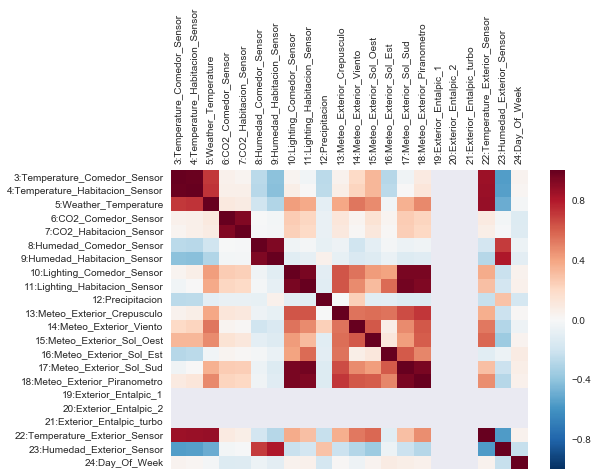

In [10]:
#we use seaborn to check the correlation of the variables
import seaborn as sns
fig = plt.figure()
plot = fig.add_axes()
plot = sns.heatmap(DF_DataSet.corr(), annot=False)
plot.xaxis.tick_top() 
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()


In [11]:
DF_SelectedVariables = DF_DataSet[['4:Temperature_Habitacion_Sensor', '5:Weather_Temperature','14:Meteo_Exterior_Viento',
                                    '22:Temperature_Exterior_Sensor','18:Meteo_Exterior_Piranometro']]  
DF_SelectedVariables.rename(columns={'4:Temperature_Habitacion_Sensor':'Inside_Temp_sensor','5:Weather_Temperature':'Weather_Temperature',
                                    '14:Meteo_Exterior_Viento':'External_Wind[m/s]','22:Temperature_Exterior_Sensor': 'Outside_Temp_sensor',
                                    '18:Meteo_Exterior_Piranometro':'Solar_irradiance'},inplace=True)

DF_SelectedVariables.head()

C:\Users\Danish\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\pandas\core\frame.py:2834: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


,Inside_Temp_sensor,Weather_Temperature,External_Wind[m/s],Outside_Temp_sensor,Solar_irradiance
Date-Time,,,,,
2012-03-13 11:45:00,17.8275,0.0,1.42625,18.1150,758.880
2012-03-13 12:00:00,18.1207,6.8,1.59200,18.4147,762.069
2012-03-13 12:15:00,18.4367,17.0,1.89133,18.8533,766.251
2012-03-13 12:30:00,18.7513,18.0,1.82800,19.2907,766.037
2012-03-13 12:45:00,19.0414,20.0,2.36071,19.7400,762.743


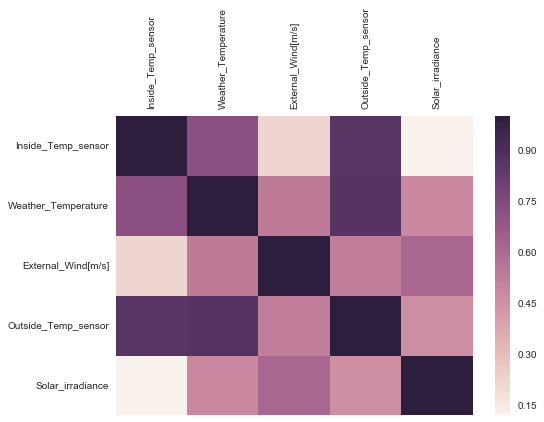

In [12]:
import seaborn as sns
fig = plt.figure()
plot = fig.add_axes()
plot = sns.heatmap(DF_SelectedVariables.corr(), annot=False)
plot.xaxis.tick_top() 
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

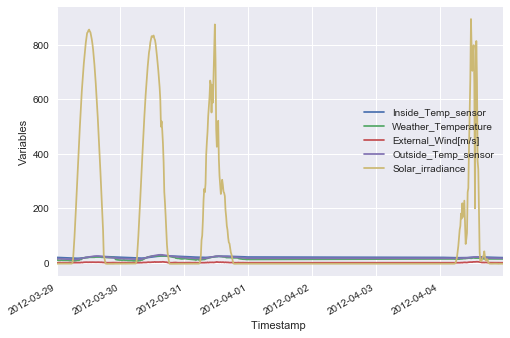

In [13]:
# for one week..Without Normalization
Selected_Data = DF_SelectedVariables['2012-03-29 00:00:00':'2012-04-04 23:45:00'] 
Selected_Data.plot()
plt.xlabel('Timestamp ')
plt.ylabel('Variables')
plt.show()

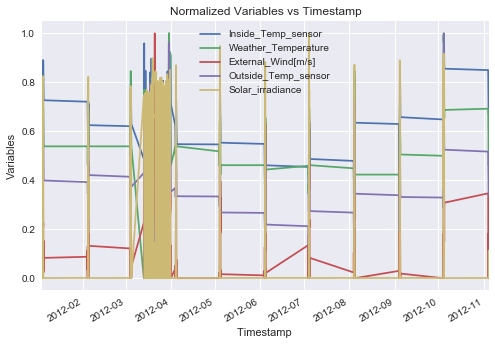

In [14]:
#Nomalizing all variable data by defining a function
def normalize(df):
    return (df - df.min())/(df.max()-df.min())   
dataSet_Normalized = normalize(DF_SelectedVariables)
dataSet_Normalized.plot()
plt.title('Normalized Variables vs Timestamp')
plt.xlabel('Timestamp ')
plt.ylabel('Variables')
plt.show()

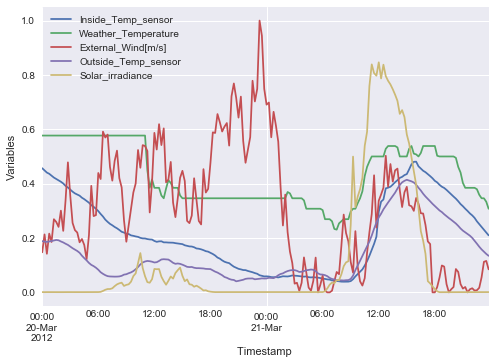

In [15]:
# In order to better check for lag with a better value we make a day slice and plot
Selected_Data1 = dataSet_Normalized['2012-03-20 00:00:00':'2012-03-21 23:45:00'] # for a day
Selected_Data1.plot()
plt.xlabel('Timestamp ')
plt.ylabel('Variables')
plt.show()
#DF = Selected_Data1[['Inside_Temp_sensor','Solar_irradiance']]
#DF.plot()


In [16]:
# For giving lagged features, we first create the copy of our selected data frame. 
#Then defining and using the function,we will create the lagged features for Sun Irradiation and Outdoor Temperature.
DF_lagged=DF_SelectedVariables.copy() 

# A function to create lag columns of selected columns passed as arguments'''


In [17]:
def lag_column(df,column_names,lag_period):    
    for column_name in column_names:
        if(column_name=="Solar_irradiance"):
            for i in range(3,lag_period+1):
                new_column_name = column_name+"_"+str(i)+"hr"
                df[new_column_name]=(df[column_name]).shift(i*4)
        elif(column_name=="Outside_Temp_sensor"):
            for i in range(1,lag_period+1):
                new_column_name = column_name+"_"+str(i)+"hr"
                df[new_column_name]=(df[column_name]).shift(i*4)
        else:
            for i in range(1,lag_period*4):
                new_column_name = column_name+"_"+str(i)+"hr before"
                df[new_column_name]=(df[column_name]).shift(-i*4)
                  
    return df  

In [18]:
DF_lagged=lag_column(DF_lagged,["Solar_irradiance","Outside_Temp_sensor","Inside_Temp_sensor"],6)  #Passing values in function
DF_lagged.dropna(inplace=True)

DF_lagged.head(0)

,Inside_Temp_sensor,Weather_Temperature,External_Wind[m/s],Outside_Temp_sensor,Solar_irradiance,Solar_irradiance_3hr,Solar_irradiance_4hr,Solar_irradiance_5hr,Solar_irradiance_6hr,Outside_Temp_sensor_1hr,...,Inside_Temp_sensor_14hr before,Inside_Temp_sensor_15hr before,Inside_Temp_sensor_16hr before,Inside_Temp_sensor_17hr before,Inside_Temp_sensor_18hr before,Inside_Temp_sensor_19hr before,Inside_Temp_sensor_20hr before,Inside_Temp_sensor_21hr before,Inside_Temp_sensor_22hr before,Inside_Temp_sensor_23hr before
Date-Time,,,,,,,,,,,,,,,,,,,,,


# Creating a plot using heatmap functionality to provide correlations between columns of dataset

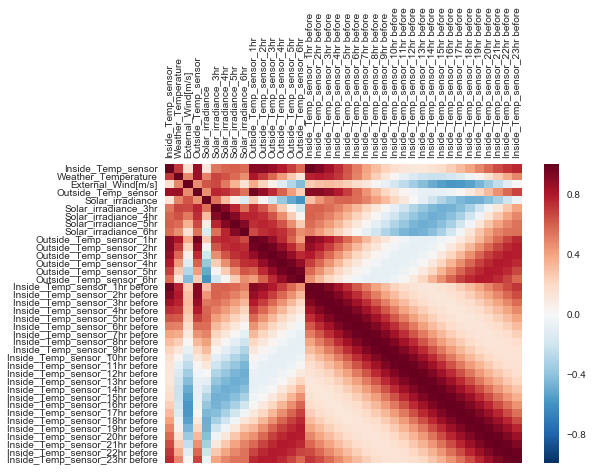

In [19]:
fig = plt.figure("Figure for providing insight about Correlations")
plot = fig.add_axes()
plot = sns.heatmap(DF_lagged.corr(), annot=False)
plot.xaxis.tick_top() 
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

In [20]:
dataSet_Normalized['Wind_10hours'] = dataSet_Normalized['External_Wind[m/s]'].shift(40)
dataSet_Normalized['Inside_Temp_sensor_1hr'] = dataSet_Normalized['Inside_Temp_sensor'].shift(-4)
dataSet_Normalized['Solar_irradiance_3hr'] = dataSet_Normalized['Solar_irradiance'].shift(12)
dataSet_Normalized.dropna(inplace=True)
Selected = dataSet_Normalized[['Inside_Temp_sensor','Inside_Temp_sensor_1hr','Wind_10hours','Outside_Temp_sensor','Solar_irradiance_3hr']]

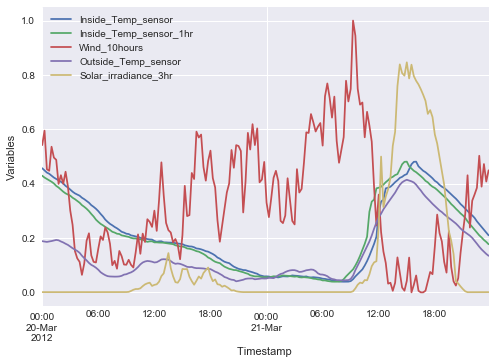

In [21]:
Selected['2012-03-20 00:00:00':'2012-03-21 23:45:00'].plot()
plt.xlabel('Timestamp ')
plt.ylabel('Variables')
plt.show()


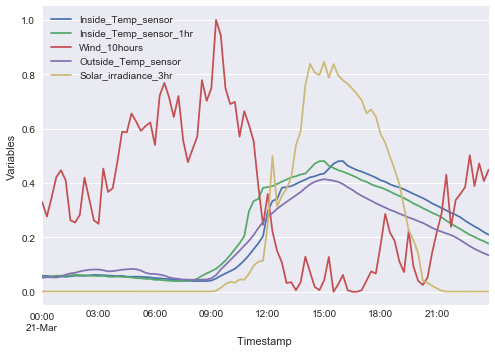

In [22]:
#for 24hrs plot
Selected['2012-03-21 00:00:00':'2012-03-21 23:59:00'].plot()
plt.xlabel('Timestamp ')
plt.ylabel('Variables')
plt.show()

In [23]:
dataSet_Normalized_sliced = dataSet_Normalized['2012-03-21 00:00:00':'2012-03-21 23:59:00']
Temp_Effect=dataSet_Normalized_sliced[['Solar_irradiance_3hr','Inside_Temp_sensor_1hr','Outside_Temp_sensor']]
Wind_Effect=dataSet_Normalized_sliced[['Inside_Temp_sensor_1hr','Wind_10hours','External_Wind[m/s]']]


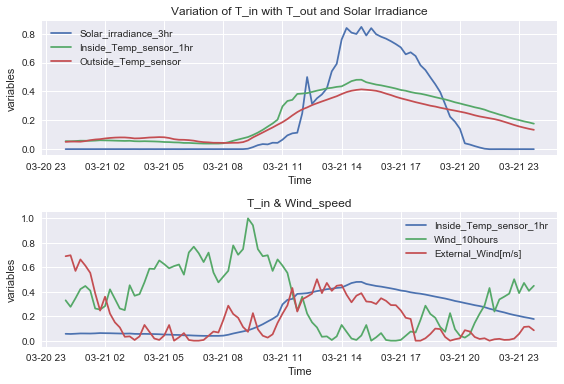

In [24]:
plt.figure()
plt.subplot(2,1,1)
plt.plot(Temp_Effect)
plt.title('Variation of T_in with T_out and Solar Irradiance')
plt.xlabel('Time')
plt.ylabel('variables')
plt.legend(Temp_Effect)

plt.subplot(2,1,2)
plt.plot(Wind_Effect)
plt.title('T_in & Wind_speed')
plt.xlabel('Time')
plt.ylabel('variables')
plt.tight_layout()
plt.legend(Wind_Effect)
plt.show()

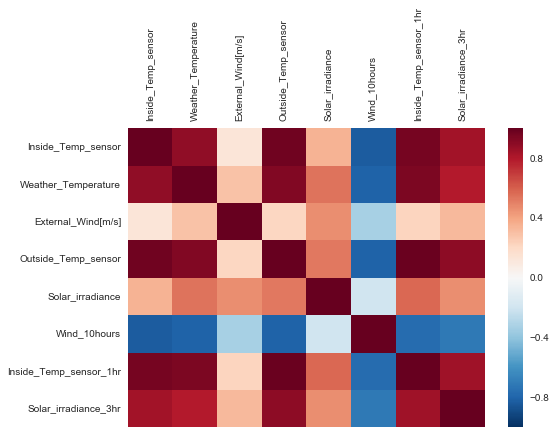

In [25]:
#checking correlation after lagging 
fig = plt.figure()
plot = fig.add_axes()
plot = sns.heatmap(dataSet_Normalized_sliced.corr(), annot=False)
plot.xaxis.tick_top() 
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

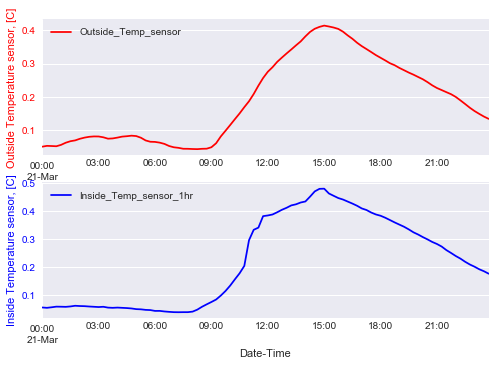

In [26]:
#Variation of T out with T in
fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
dataSet_Normalized_sliced.iloc[:,3].plot(ax=ax1,legend=True,color="r")
dataSet_Normalized_sliced.iloc[:,6].plot(ax=ax2,legend=True,color="b")
ax1.set_ylabel("Outside Temperature sensor, [C]", color="r")
ax2.set_ylabel("Inside Temperature sensor, [C]", color="b")
ax1.tick_params(axis='y',colors='r')
ax2.tick_params(axis='y',colors='b')
plt.show()

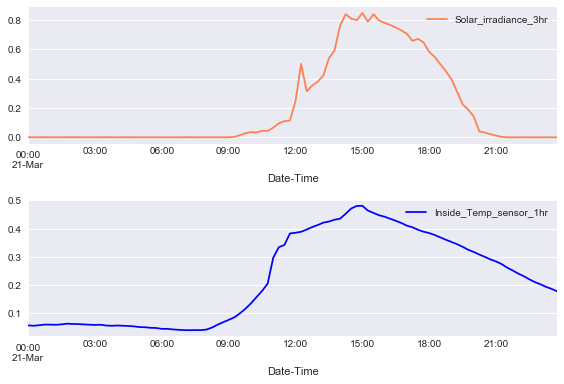

In [27]:
#Variation of T in  with Solar irradiation
fig1 = plt.figure()
ax3 = fig1.add_subplot(2,1,1)
ax4 = fig1.add_subplot(2,1,2)
dataSet_Normalized_sliced.iloc[:,7].plot(ax=ax3,legend=True,color="coral")
dataSet_Normalized_sliced.iloc[:,6].plot(ax=ax4,legend=True,color="b")
ax1.set_ylabel("Solar_irradiance[W/m2]", color="coral")
ax2.set_ylabel("Inside Temperature sensor, [C]", color="b")
ax1.tick_params(axis='y',colors='coral')
ax2.tick_params(axis='y',colors='b')
plt.tight_layout()
plt.show()

# Machine Learning and Prediction using sklearn library in python


In [28]:
DF_SelectedVariables=DF_lagged[['Inside_Temp_sensor_1hr before','Outside_Temp_sensor','Solar_irradiance_3hr','External_Wind[m/s]']]

#Testing Our Model
target = DF_SelectedVariables['Inside_Temp_sensor_1hr before']
features = DF_SelectedVariables[['Outside_Temp_sensor','Solar_irradiance_3hr','External_Wind[m/s]']]


# Method 1:Using Linear regression

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=123524)

from sklearn import linear_model
linear_reg = linear_model.LinearRegression()
linear_reg.fit(X_train,y_train)
prediction = linear_reg.predict(X_test)
predict_series = pd.Series(prediction.ravel(),index=y_test.index).rename('Predicted_T_in')
joined = pd.DataFrame(predict_series).join(y_test)
#joined.isnull()

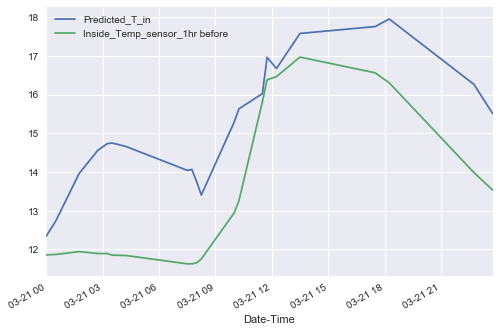

In [30]:
#for 24hrs
joined['2012-03-21 00:00:00':'2012-03-21 23:59:00'].plot()
plt.show()
plt.xlabel('Timestamp')
plt.ylabel('variables')


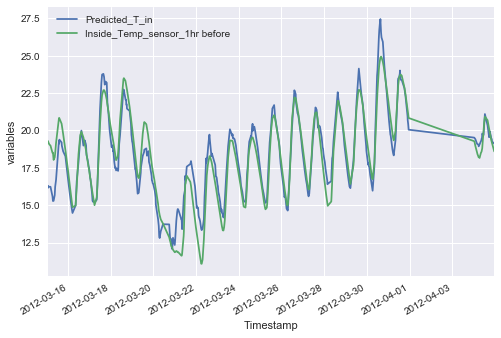

In [32]:
#for one Month
joined['2012-03-15':'2012-04-15'].plot()
plt.xlabel('Timestamp')
plt.ylabel('variables')
plt.show()

In [33]:
# Calculating the accuracy metrics of the implemented machine learning model
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
R2_score = r2_score(y_test,prediction)
mean_absolute_error = mean_absolute_error(y_test,prediction)
mean_squared_error = mean_squared_error(y_test,prediction)
coeff_variation = np.sqrt(mean_squared_error)/y_test.mean()
print "The R2_score is: "+str(R2_score)
print "The Mean absoulute error is: "+str(mean_absolute_error)
print "The Mean squared error is: "+str(mean_squared_error)
print "The Coefficient of variation is: "+str(coeff_variation)



The R2_score is: 0.872710230919
The Mean absoulute error is: 0.790016566358
The Mean squared error is: 1.00292682384
The Coefficient of variation is: 0.0537916737892


# Method 2:Using support vector machines,SVM

In [40]:
from sklearn.model_selection import cross_val_predict
from sklearn.svm import SVR
SVR_reg = SVR(kernel='rbf',C=10,gamma=1)
predict_SVR_CV = cross_val_predict(SVR_reg,features,target,cv=10)
predict_DF_SVR_CV=pd.DataFrame(predict_SVR_CV, index = target.index,columns=["Predicted T_in_SVR_CV"])
predict_DF_SVR_CV = predict_DF_SVR_CV.join(target).dropna()

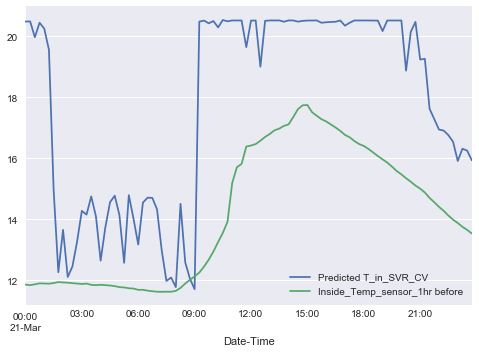

In [51]:
# Plotting the learned dataset and verifying the predicted values with actual ones
predict_DF_SVR_CV['2012-03-21 00:00:00':'2012-03-21 23:59:00'].plot()
plt.show()

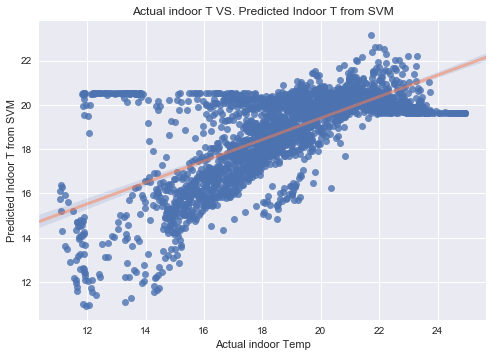

In [52]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
plot = sns.regplot(x='Inside_Temp_sensor_1hr before', y="Predicted T_in_SVR_CV",
                   data=predict_DF_SVR_CV,ax=ax1,
                   line_kws={"lw":3,"alpha":0.5})
plt.title('Actual indoor T VS. Predicted Indoor T from SVM')
plot.set_xlabel('Actual indoor Temp')
plot.set_ylabel('Predicted Indoor T from SVM')
regline = plot.get_lines()[0];
regline.set_color('coral')
plt.show()

# Calculat


In [53]:
# Calculating the accuracy metrics of the implemented machine learning model
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
R2_score_DF_SVR_CV = r2_score(predict_DF_SVR_CV['Inside_Temp_sensor_1hr before'],predict_DF_SVR_CV["Predicted T_in_SVR_CV"])
mean_absolute_error_SVR_CV = mean_absolute_error(predict_DF_SVR_CV["Inside_Temp_sensor_1hr before"],predict_DF_SVR_CV["Predicted T_in_SVR_CV"])
mean_squared_error_SVR_CV = mean_squared_error(predict_DF_SVR_CV["Inside_Temp_sensor_1hr before"],predict_DF_SVR_CV["Predicted T_in_SVR_CV"])
coeff_variation_SVR_CV = np.sqrt(mean_squared_error_SVR_CV)/predict_DF_SVR_CV["Inside_Temp_sensor_1hr before"].mean()
print "The R2_score for SVR is: "+str(R2_score_DF_SVR_CV)
print "The Mean absoulute error for SVR is: "+str(mean_absolute_error_SVR_CV)
print "The Mean squared error for SVR is: "+str(mean_squared_error_SVR_CV)
print "The Coefficient of variation for SVR is: "+str(coeff_variation_SVR_CV)


The R2_score for SVR is: 0.444495997519
The Mean absoulute error for SVR is: 1.40292547992
The Mean squared error for SVR is: 4.22236916345
The Coefficient of variation for SVR is: 0.110038182184


# Method 3: Implementing Random Forest regression approach to test the performance of the machine learning model

In [54]:
from sklearn.model_selection import cross_val_predict 
from sklearn.ensemble import RandomForestRegressor
reg_RF = RandomForestRegressor()
predict_RF_CV = cross_val_predict(reg_RF,features,target,cv=10) 
predict_DF_RF_CV=pd.DataFrame(predict_RF_CV, index = target.index,columns=['Predicted_T_in_RF_CV'])
predict_DF_RF_CV = predict_DF_RF_CV.join(target).dropna()

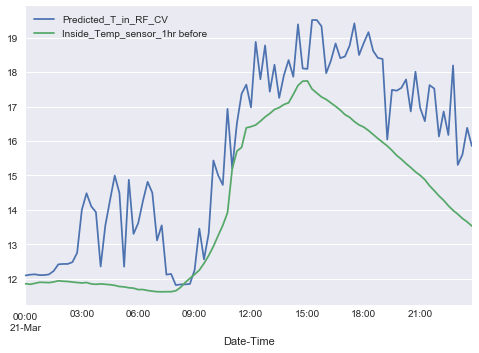

In [55]:
predict_DF_RF_CV['2012-03-21 00:00:00':'2012-03-21 23:59:00'].plot()
plt.show()

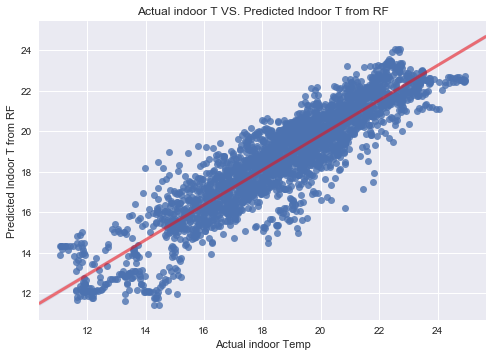

In [56]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
plot = sns.regplot(x='Inside_Temp_sensor_1hr before', y='Predicted_T_in_RF_CV',
                   data=predict_DF_RF_CV,ax=ax1,
                   line_kws={"lw":3,"alpha":0.5})
plt.title('Actual indoor T VS. Predicted Indoor T from RF')
plot.set_xlabel('Actual indoor Temp')
plot.set_ylabel('Predicted Indoor T from RF')
regline = plot.get_lines()[0];
regline.set_color('r')
plt.show()

In [57]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
R2_score_DF_RF_CV = r2_score(predict_DF_RF_CV['Inside_Temp_sensor_1hr before'],predict_DF_RF_CV['Predicted_T_in_RF_CV'])
mean_absolute_error_DF_CV =  mean_absolute_error(predict_DF_RF_CV['Inside_Temp_sensor_1hr before'],predict_DF_RF_CV['Predicted_T_in_RF_CV'])
mean_squared_error_DF_CV = mean_squared_error(predict_DF_RF_CV['Inside_Temp_sensor_1hr before'],predict_DF_RF_CV['Predicted_T_in_RF_CV'])
coeff_variation_DF_CV = np.sqrt(mean_squared_error_DF_CV)/predict_DF_RF_CV['Inside_Temp_sensor_1hr before'].mean()
print "The R2_score for RF is: "+str(R2_score_DF_RF_CV)
print "The Mean absoulute for RF error is: "+str(mean_absolute_error_DF_CV)
print "The Mean squared error for RF is: "+str(mean_squared_error_DF_CV)
print "The Coefficient of variation for RF is: "+str(coeff_variation_DF_CV)

The R2_score for RF is: 0.82073361399
The Mean absoulute for RF error is: 0.904995752581
The Mean squared error for RF is: 1.36259839164
The Coefficient of variation for RF is: 0.0625099631222


In [58]:
#Making a table of our anaylsis from the machine Learning process..using Dictionary
df = pd.DataFrame({'Metrics':['R2_score','mean absolute error','mean squared error','coefficient variation'],
                'Linear Regression':[R2_score,mean_absolute_error,mean_squared_error,coeff_variation],
                'SVM':[R2_score_DF_SVR_CV,mean_absolute_error_SVR_CV,mean_squared_error_SVR_CV,coeff_variation_SVR_CV],
                'Random Forest':[R2_score_DF_RF_CV,mean_absolute_error_DF_CV,mean_squared_error_DF_CV,coeff_variation_DF_CV]})
df.set_index('Metrics',inplace=True)
df.index.name=None
df.round(4)


,Linear Regression,Random Forest,SVM
R2_score,0.87271,0.8207,0.4445
mean absolute error,<function mean_absolute_error at 0x00000000117...,0.9050,1.4029
mean squared error,<function mean_squared_error at 0x000000001171...,1.3626,4.2224
coefficient variation,0.0537917,0.0625,0.1100
